In [1]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt



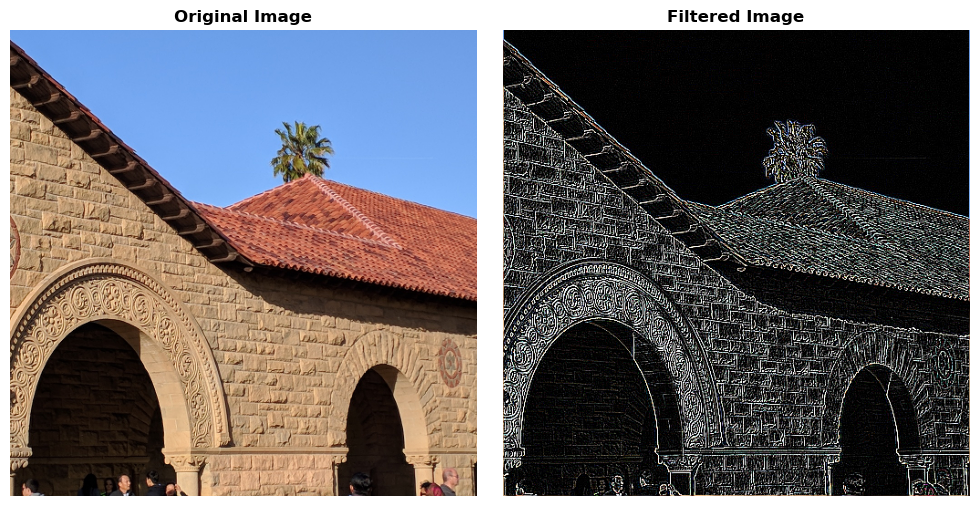

In [3]:
# Load the image
image_path = '4780_input.png'  # Replace with your image path
try:
    image = Image.open(image_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Image not found at {image_path}")



# Convert the image to RGB (if not already in RGB mode)
image_rgb = image.convert("RGB")

# Define a 3x3 filter kernel (e.g., edge detection)
filter_kernel = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])

# Normalize the kernel for PIL (PIL expects normalized kernels)
filter_kernel_normalized = filter_kernel / filter_kernel.sum() if filter_kernel.sum() != 0 else filter_kernel

# Apply the filter using PIL's filter method
filtered_image = image_rgb.filter(ImageFilter.Kernel((3, 3), filter_kernel_normalized.flatten(), scale=1))

# Convert images to arrays for visualization
image_rgb_array = np.array(image_rgb)
filtered_image_array = np.array(filtered_image)

# Visualize the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb_array)
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_array)
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

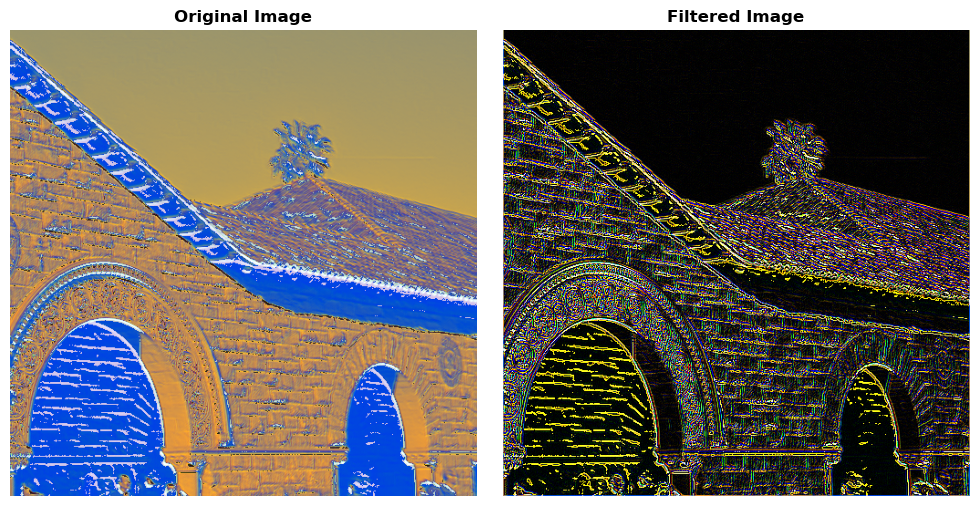

In [4]:
# Load the image
image_path = '4780_target.png'  # Replace with your image path
try:
    image = Image.open(image_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Image not found at {image_path}")



# Convert the image to RGB (if not already in RGB mode)
image_rgb = image.convert("RGB")

# Define a 3x3 filter kernel (e.g., edge detection)
filter_kernel = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])

# Normalize the kernel for PIL (PIL expects normalized kernels)
filter_kernel_normalized = filter_kernel / filter_kernel.sum() if filter_kernel.sum() != 0 else filter_kernel

# Apply the filter using PIL's filter method
filtered_image = image_rgb.filter(ImageFilter.Kernel((3, 3), filter_kernel_normalized.flatten(), scale=1))

# Convert images to arrays for visualization
image_rgb_array = np.array(image_rgb)
filtered_image_array = np.array(filtered_image)

# Visualize the original and filtered images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb_array)
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_array)
plt.title('Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

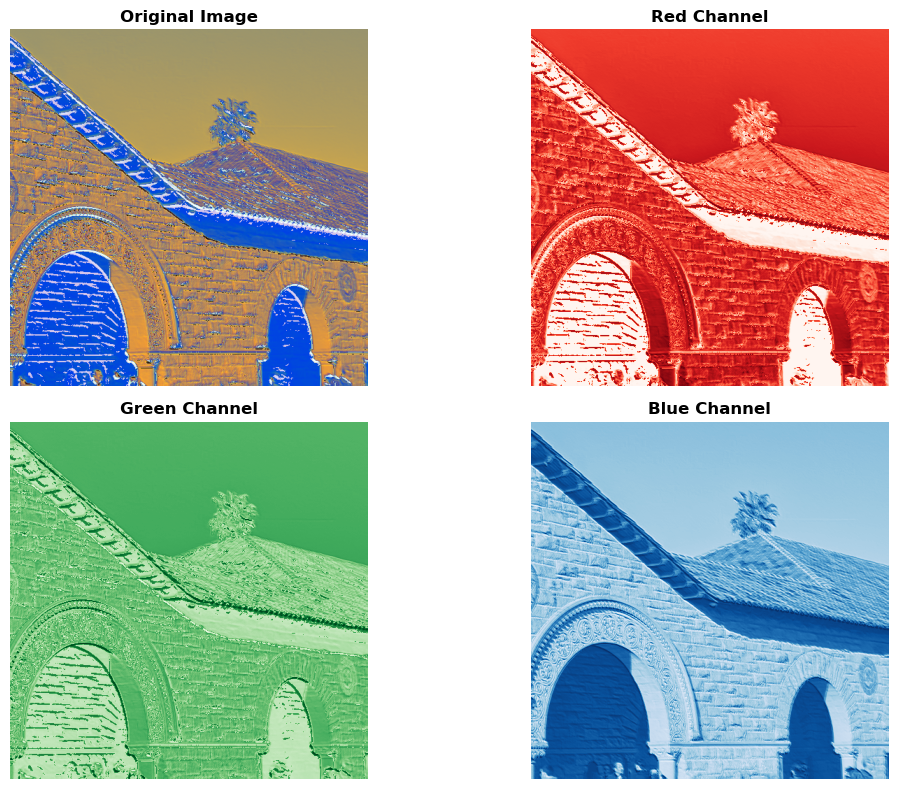

In [7]:
# Load the image
image_path = '4780_target.png'  # Replace with your image path
try:
    image = Image.open(image_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert the image to RGB (if not already in RGB mode)
image_rgb = image.convert("RGB")

# Split the image into R, G, B channels
r, g, b = image_rgb.split()

# Convert the channels to numpy arrays for visualization
r_array = np.array(r)
g_array = np.array(g)
b_array = np.array(b)

# Plot the original image and its three channels
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Red channel
plt.subplot(2, 2, 2)
plt.imshow(r_array, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(2, 2, 3)
plt.imshow(g_array, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 4)
plt.imshow(b_array, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


Computed Kernel:
[[ 0.04107011  0.03765095  0.13450315  0.02680719  0.13967127]
 [ 0.01323645 -0.00817473  0.03640557  0.09910469  0.03314158]
 [ 0.09563898  0.02581976  0.01039514 -0.02641825  0.10116773]
 [ 0.01043225 -0.01402196  0.06286859 -0.00602844  0.02481551]
 [ 0.0635544   0.00895209  0.05464369 -0.05081076  0.03125225]]


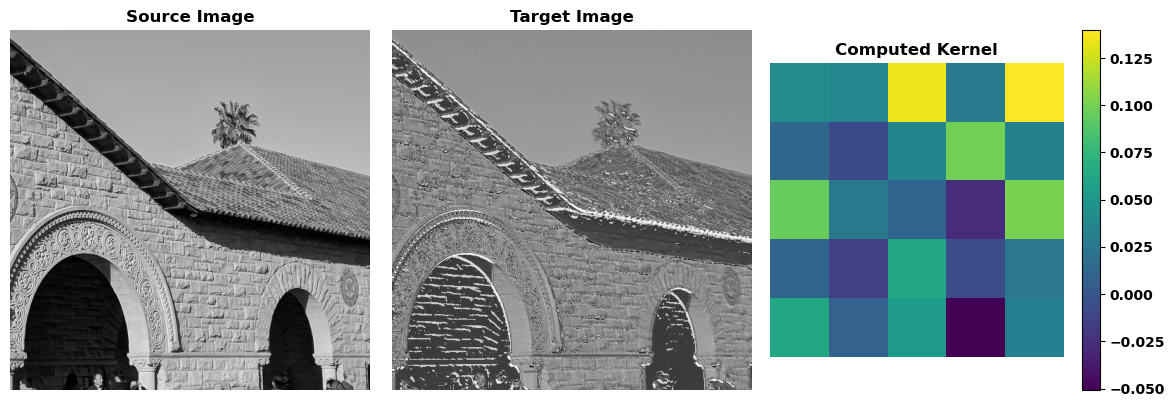

In [30]:
from scipy.linalg import lstsq

# Load the source and target images
source_image_path = '4780_input.png'  # Replace with your source image path
target_image_path = '4780_target.png'  # Replace with your target image path

try:
    source_image = Image.open(source_image_path).convert("L")  # Convert to grayscale
    target_image = Image.open(target_image_path).convert("L")  # Convert to grayscale
except FileNotFoundError as e:
    raise FileNotFoundError(str(e))

# Convert images to numpy arrays
source_array = np.array(source_image, dtype=np.float64)
target_array = np.array(target_image, dtype=np.float64)

# Ensure the images have the same dimensions
if source_array.shape != target_array.shape:
    raise ValueError("Source and target images must have the same dimensions")

# Kernel size (e.g., 3x3)
kernel_size = 5
pad = kernel_size // 2

# Pad the source image to handle edges
padded_source = np.pad(source_array, pad, mode='constant', constant_values=0)

# Prepare the A matrix (neighborhoods) and b vector (target intensities)
h, w = source_array.shape
A = []
b = []

for i in range(h):
    for j in range(w):
        # Extract the neighborhood
        neighborhood = padded_source[i:i + kernel_size, j:j + kernel_size].flatten()
        A.append(neighborhood)
        b.append(target_array[i, j])

A = np.array(A)
b = np.array(b)

# Solve for the kernel using least squares
k, _, _, _ = lstsq(A, b)
kernel = k.reshape((kernel_size, kernel_size))

# Display the resulting kernel
print("Computed Kernel:")
print(kernel)

# Visualize the source, target, and kernel
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(source_array, cmap='gray')
plt.title('Source Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(target_array, cmap='gray')
plt.title('Target Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(kernel, cmap='viridis')
plt.title('Computed Kernel')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

# Normalize the kernel for PIL (PIL expects normalized kernels)
filter_kernel_normalized = kernel / kernel.sum() if kernel.sum() != 0 else kernel





In [32]:
# Define a function to apply a kernel to a 2D array using PIL
def apply_kernel_with_pil(array, kernel):
    # Convert the array to a PIL image
    image = Image.fromarray(array.astype(np.float32))
    image = image.convert("L")

    # Flatten the kernel and normalize it for PIL
    kernel_size = kernel.shape[0]
    kernel_flattened = kernel.flatten()
    kernel_normalized = kernel_flattened / kernel_flattened.sum() if kernel_flattened.sum() != 0 else kernel_flattened

    # Apply the kernel using ImageFilter.Kernel
    filtered_image = image.filter(ImageFilter.Kernel((kernel_size, kernel_size), kernel_normalized, scale=1))

    # Convert the filtered image back to a numpy array
    return np.array(filtered_image)



# Apply the kernel to the array
filtered_array = apply_kernel_with_pil(source_array, filter_kernel_normalized)

(-0.5, 511.5, 511.5, -0.5)

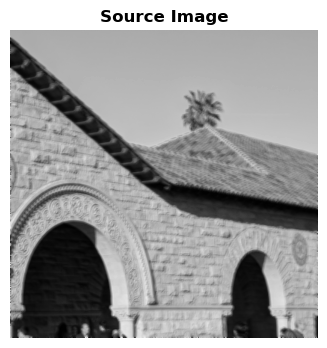

In [33]:
# Visualize the source, target, and kernel
plt.figure(figsize=(12, 4))

plt.imshow(filtered_array, cmap='gray')
plt.title('Source Image')
plt.axis('off')

In [34]:
np.linalg.norm(target_array - source_array)

27895.29933519266

In [35]:
np.linalg.norm(target_array - filtered_array)

25586.493819982446